# import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set_theme()

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
dtypes = {
    'YEAR': 'Int32', 
    'MM': 'Int32', 
    'DD': 'Int32', 
    'WEEK': 'Int32', 
    'SITE': 'object', 
    'PERIOD': 'object', 
    'CONDITION': 'object', 
    'FISH_NO': 'Int32', 
    'FL_WET': 'Int32', 
    'FL_FROZEN': 'object',  # error: Unable to parse string " ", covert to numeric manually
    'FL_STD': 'float64',
    'WEIGHT': 'float64',
    'SPECIES': 'object', 
    'SEX': 'object', 
    'MATURITY': 'object',  # error: Unable to parse string " ", covert to numeric manually
    'GONAD_WEIGHT': 'object',  # error: Unable to parse string " ", covert to numeric manually
    '1st Person Aging': 'object',  # error: could not convert string to float: ''
    'AGE': 'object',  # error: Unable to parse string "No Slide", covert to numeric manually
    'FSP': 'object',  # error: Unable to parse string " ", covert to numeric manually
    'Comments': 'object', 
    '2nd Person Aging': 'object', 
    'AGE.1': 'object',  # error: Unable to parse string ".", covert to numeric manually
    'FSP.1': 'object',  # error: Unable to parse string ".", covert to numeric manually
    'Comments.1': 'object', 
    'Envelop Comments': 'object'
} 

# initial data import
df = pd.read_csv('csv_MASTER_Gaspereau_details_Larry.csv', dtype=dtypes)

# create backup of notes (including all numeric data for simplicity)
df['AGE_notes'] = df['AGE']
df['FSP_notes'] = df['FSP']

# convert to numeric and coerce errors (all non-numeric data converted to null)
df['FL_FROZEN'] = pd.to_numeric(df['FL_FROZEN'], errors='coerce').astype('Int32')
df['MATURITY'] = pd.to_numeric(df['MATURITY'], errors='coerce').astype('Int32')
df['GONAD_WEIGHT'] = pd.to_numeric(df['GONAD_WEIGHT'], errors='coerce')  # float
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce').astype('Int32')
df['FSP'] = pd.to_numeric(df['FSP'], errors='coerce').astype('Int32')
df['AGE.1'] = pd.to_numeric(df['AGE.1'], errors='coerce').astype('Int32')
df['FSP.1'] = pd.to_numeric(df['FSP.1'], errors='coerce').astype('Int32')

# add a DATETIME column for plotting time series
df['DATETIME'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MM'].astype(str) + '-' + df['DD'].astype(str))

# cleaning the data

### PERIOD and CONDITION: merge different spellings

In [3]:
# cleaning categorical data
df.loc[df.PERIOD == 'PM ', 'PERIOD'] = 'PM'
df.loc[df.CONDITION == 'FROZEN', 'CONDITION'] = 'Frozen'
df.loc[df.CONDITION == 'FRESH', 'CONDITION'] = 'Fresh'

### PERIOD: convert 'AD' to 'AM' - CONFIRM
### (118 entries)

In [4]:
confirm_AD_to_AM = True

if confirm_AD_to_AM:
    df.loc[df.PERIOD == 'AD', 'PERIOD'] = 'AM'

### FL_STD: null or scale - CONFIRM
### (264 entries)

In [5]:
confirm_FL_STD_null = True
confirm_FL_STD_scale = False

# record indices of problems before transforming
index_FL_STD_problems = list(df.loc[df.FL_STD < 100, 'FL_STD'].index)

if confirm_FL_STD_null:
    df.loc[df.FL_STD < 100, 'FL_STD'] = np.nan
if confirm_FL_STD_scale:
    df.loc[df.FL_STD < 100, 'FL_STD'] = df.loc[df.FL_STD < 100, 'FL_STD'] * 10
    
# df['FL_STD'] = df['FL_STD'].astype(float)

In [6]:
# confirm data looks as expected now
df.iloc[index_FL_STD_problems]

,YEAR,MM,DD,WEEK,SITE,PERIOD,CONDITION,FISH_NO,FL_WET,FL_FROZEN,FL_STD,WEIGHT,SPECIES,SEX,MATURITY,GONAD_WEIGHT,1st Person Aging,AGE,FSP,Comments,2nd Person Aging,AGE.1,FSP.1,Comments.1,Envelop Comments,AGE_notes,FSP_notes,DATETIME
34794,2019,5,31,5,26,AM,Fresh,1,<NA>,<NA>,NaN,223.100,A,F,4,22.800,JM,5,4,?BB Mark not full,NaN,<NA>,<NA>,NaN,NaN,5,4,2019-05-31
34795,2019,5,31,5,26,AM,Fresh,2,<NA>,<NA>,NaN,138.100,A,M,4,NaN,JM,3,3,NaN,NaN,<NA>,<NA>,NaN,NaN,3,3,2019-05-31
34796,2019,5,31,5,26,AM,Fresh,3,<NA>,<NA>,NaN,233.200,A,F,4,22.500,JM,5,4,NaN,NaN,<NA>,<NA>,NaN,NaN,5,4,2019-05-31
34797,2019,5,31,5,26,AM,Fresh,4,<NA>,<NA>,NaN,271.600,A,F,4,16.700,JM,5,3,NaN,NaN,<NA>,<NA>,NaN,NaN,5,3,2019-05-31
34798,2019,5,31,5,26,AM,Fresh,5,<NA>,<NA>,NaN,119.700,A,M,4,NaN,JM,3,3,NaN,NaN,<NA>,<NA>,NaN,NaN,3,3,2019-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35181,2019,6,21,8,41,AM,Frozen,33,<NA>,<NA>,NaN,158.500,A,F,4,14.700,JM,3,3,NaN,NaN,<NA>,<NA>,NaN,NaN,3,3,2019-06-21
35182,2019,6,21,8,41,AM,Frozen,34,<NA>,<NA>,NaN,174.000,A,M,4,NaN,JM,4,3,NaN,NaN,<NA>,<NA>,NaN,NaN,4,3,2019-06-21
35183,2019,6,21,8,41,AM,Frozen,35,<NA>,<NA>,NaN,109.800,B,M,4,NaN,JM,4,4,Dark,NaN,<NA>,<NA>,NaN,NaN,4,4,2019-06-21
35184,2019,6,21,8,41,AM,Frozen,36,2,2,NaN,151.800,B,F,4,16.100,JM,4,4,Root+Apex,NaN,<NA>,<NA>,NaN,NaN,4,4,2019-06-21


### FL_WET and FL_FROZEN: null or scale - CONFIRM
### (5 entries)

In [7]:
confirm_FL_WF_null = True
confirm_FL_WF_scale = False

# NOTE: indices from Excel are 1 indexed, not 0 indexed, and row 1 is the header
# therefore, the indices are off by 2
idx_dict = {
    35058-2: 100,
    35143-2: 10,
    35157-2: 100,
    35158-2: 100,
    35186-2: 100
}

# split these into variables to improve readability
indices = idx_dict.keys()
scale_factors = [idx_dict[k] for k in idx_dict.keys()]

if confirm_FL_WF_null:
    df.loc[indices, 'FL_WET'] = np.nan
    df.loc[indices, 'FL_FROZEN'] = np.nan
if confirm_FL_WF_scale:
    df.loc[indices, 'FL_WET'] = df.loc[indices, 'FL_WET'] * scale_factors
    df.loc[indices, 'FL_FROZEN'] = df.loc[indices, 'FL_FROZEN'] * scale_factors

In [8]:
# confirm data looks as expected now
df.loc[indices]

,YEAR,MM,DD,WEEK,SITE,PERIOD,CONDITION,FISH_NO,FL_WET,FL_FROZEN,FL_STD,WEIGHT,SPECIES,SEX,MATURITY,GONAD_WEIGHT,1st Person Aging,AGE,FSP,Comments,2nd Person Aging,AGE.1,FSP.1,Comments.1,Envelop Comments,AGE_notes,FSP_notes,DATETIME
35056,2019,6,14,7,25,PM,Frozen,7,<NA>,<NA>,NaN,221.300,B,M,4,NaN,JM,6,3,"Ck Lgth, Possible 5-3",NaN,<NA>,<NA>,NaN,NaN,6,3,2019-06-14
35141,2019,6,19,8,41,PM,Frozen,28,<NA>,<NA>,NaN,228.600,A,F,4,35.900,JM,5,4,?able4,NaN,<NA>,<NA>,NaN,NaN,5,4,2019-06-19
35155,2019,6,21,8,41,AM,Frozen,7,<NA>,<NA>,NaN,97.000,B,M,4,NaN,JM,4,3,Ck Lgth,NaN,<NA>,<NA>,NaN,NaN,4,3,2019-06-21
35156,2019,6,21,8,41,AM,Frozen,8,<NA>,<NA>,NaN,103.800,B,M,4,NaN,JM,3,3,Dark,NaN,<NA>,<NA>,NaN,NaN,3,3,2019-06-21
35184,2019,6,21,8,41,AM,Frozen,36,<NA>,<NA>,NaN,151.800,B,F,4,16.100,JM,4,4,Root+Apex,NaN,<NA>,<NA>,NaN,NaN,4,4,2019-06-21


### SEX: leave or null 'U' - CONFIRM
NOTE: there are 749 'U' in 1987 (way more than all other years combined (797))

In [9]:
confirm_SEX_U_null = False

if confirm_SEX_U_null:
     df.loc[df.SEX == 'U', 'SEX'] = np.nan

In [10]:
# confirm data looks as expected now
df.loc[df.SEX == 'U']

,YEAR,MM,DD,WEEK,SITE,PERIOD,CONDITION,FISH_NO,FL_WET,FL_FROZEN,FL_STD,WEIGHT,SPECIES,SEX,MATURITY,GONAD_WEIGHT,1st Person Aging,AGE,FSP,Comments,2nd Person Aging,AGE.1,FSP.1,Comments.1,Envelop Comments,AGE_notes,FSP_notes,DATETIME
3436,1987,5,21,<NA>,12,NaN,Frozen,1,<NA>,230,238.000,199.000,A,U,2,NaN,NaN,3,3,NaN,NaN,<NA>,<NA>,NaN,NaN,3,3,1987-05-21
3437,1987,5,21,<NA>,12,NaN,Frozen,2,<NA>,240,248.000,231.000,A,U,2,NaN,NaN,3,3,NaN,NaN,<NA>,<NA>,NaN,NaN,3,3,1987-05-21
3438,1987,5,21,<NA>,12,NaN,Frozen,3,<NA>,253,261.000,249.000,A,U,2,NaN,NaN,4,4,NaN,NaN,<NA>,<NA>,NaN,NaN,4,4,1987-05-21
3439,1987,5,21,<NA>,12,NaN,Frozen,4,<NA>,242,250.000,207.000,A,U,2,NaN,NaN,3,3,NaN,NaN,<NA>,<NA>,NaN,NaN,3,3,1987-05-21
3440,1987,5,21,<NA>,12,NaN,Frozen,5,<NA>,249,257.000,256.000,A,U,2,46.900,NaN,3,3,NaN,NaN,<NA>,<NA>,NaN,NaN,3,3,1987-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27620,2012,6,22,8,2,PM,Frozen,17,<NA>,153,160.000,38.100,B,U,<NA>,NaN,NaN,2,2,NaN,NaN,<NA>,<NA>,NaN,NaN,2,2,2012-06-22
27649,2012,6,22,8,2,PM,Frozen,46,<NA>,140,147.000,32.300,B,U,<NA>,NaN,NaN,1,1,NaN,NaN,<NA>,<NA>,NaN,NaN,1,1,2012-06-22
27817,2012,6,27,9,26,AM,Frozen,8,<NA>,126,132.000,22.400,B,U,<NA>,NaN,NaN,1,1,NaN,NaN,<NA>,<NA>,NaN,NaN,1,1,2012-06-27
28377,2013,5,29,5,47,PM,Frozen,5,<NA>,257,265.000,197.100,A,U,0,NaN,JM,4,4,NaN,NaN,<NA>,<NA>,NaN,NaN,4,4,2013-05-29


### SEX: leave or null 'B' - CONFIRM
### (only 1 entry) 
* confirm B is not 'both' (if so, could change label to 'H' for hermaphrodite)

In [11]:
confirm_SEX_B_null = True

if confirm_SEX_B_null:
     df.loc[df.SEX == 'B', 'SEX'] = np.nan

In [12]:
# confirm data looks as expected now
df.loc[df.SEX == 'B']

,YEAR,MM,DD,WEEK,SITE,PERIOD,CONDITION,FISH_NO,FL_WET,FL_FROZEN,FL_STD,WEIGHT,SPECIES,SEX,MATURITY,GONAD_WEIGHT,1st Person Aging,AGE,FSP,Comments,2nd Person Aging,AGE.1,FSP.1,Comments.1,Envelop Comments,AGE_notes,FSP_notes,DATETIME


### MATURITY: leave or null '44' - CONFIRM
### (only 1 entry)

In [13]:
confirm_MATURITY_44_null = True

if confirm_MATURITY_44_null:
     df.loc[df.MATURITY == 44, 'MATURITY'] = np.nan

In [14]:
# confirm data looks as expected now
df.loc[df.MATURITY == 44]

,YEAR,MM,DD,WEEK,SITE,PERIOD,CONDITION,FISH_NO,FL_WET,FL_FROZEN,FL_STD,WEIGHT,SPECIES,SEX,MATURITY,GONAD_WEIGHT,1st Person Aging,AGE,FSP,Comments,2nd Person Aging,AGE.1,FSP.1,Comments.1,Envelop Comments,AGE_notes,FSP_notes,DATETIME


### WEIGHT: Nullify outliers - CONFIRM
### (6 entries)

In [15]:
confirm_WEIGHT_null = False

max_weight = 500

if confirm_WEIGHT_null:
     df.loc[df.WEIGHT > max_weight, 'WEIGHT'] = np.nan

In [16]:
df.loc[df.WEIGHT > max_weight]

,YEAR,MM,DD,WEEK,SITE,PERIOD,CONDITION,FISH_NO,FL_WET,FL_FROZEN,FL_STD,WEIGHT,SPECIES,SEX,MATURITY,GONAD_WEIGHT,1st Person Aging,AGE,FSP,Comments,2nd Person Aging,AGE.1,FSP.1,Comments.1,Envelop Comments,AGE_notes,FSP_notes,DATETIME
724,1984,5,1,<NA>,12,NaN,Frozen,30,<NA>,316,325.000,519.000,A,F,2,NaN,NaN,7,6,NaN,NaN,<NA>,<NA>,NaN,NaN,7,6,1984-05-01
735,1984,5,2,<NA>,12,NaN,Frozen,1,<NA>,316,325.000,539.000,A,F,2,NaN,NaN,8,4,NaN,NaN,<NA>,<NA>,NaN,NaN,8,4,1984-05-02
956,1984,5,8,<NA>,12,NaN,Frozen,27,<NA>,310,319.000,501.000,A,F,2,NaN,NaN,8,3,NaN,NaN,<NA>,<NA>,NaN,NaN,8,3,1984-05-08
2042,1985,5,16,<NA>,12,NaN,Frozen,5,<NA>,317,326.000,512.000,A,F,2,83.000,NaN,9,3,NaN,NaN,<NA>,<NA>,NaN,NaN,9,3,1985-05-16
6917,1989,5,13,<NA>,35,PM,Frozen,23,<NA>,305,314.000,503.000,A,F,4,95.000,NaN,4,4,NaN,NaN,<NA>,<NA>,NaN,NaN,4,4,1989-05-13
35019,2019,6,11,7,41,PM,Frozen,1,<NA>,<NA>,NaN,1934.000,A,M,4,NaN,JM,4,3,NaN,NaN,<NA>,<NA>,NaN,NaN,4,3,2019-06-11


### GONAD_WEIGHT: Nullify outliers - CONFIRM
### (7 entries)

In [17]:
confirm_GONAD_null = False

max_gonad_weight = 200

if confirm_GONAD_null:
     df.loc[df.GONAD_WEIGHT > max_gonad_weight, 'GONAD_WEIGHT'] = np.nan

In [18]:
df.loc[df.GONAD_WEIGHT > max_gonad_weight]

,YEAR,MM,DD,WEEK,SITE,PERIOD,CONDITION,FISH_NO,FL_WET,FL_FROZEN,FL_STD,WEIGHT,SPECIES,SEX,MATURITY,GONAD_WEIGHT,1st Person Aging,AGE,FSP,Comments,2nd Person Aging,AGE.1,FSP.1,Comments.1,Envelop Comments,AGE_notes,FSP_notes,DATETIME
6285,1989,5,16,<NA>,38,PM,Frozen,41,<NA>,270,278.000,283.000,A,F,4,417.000,NaN,4,4,NaN,NaN,<NA>,<NA>,NaN,NaN,4,4,1989-05-16
14131,1995,6,2,5,"41,35",AM,Frozen,7,<NA>,276,284.000,337.000,A,F,4,766.000,NaN,<NA>,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,1995-06-02
23059,2008,5,20,4,26,AM,Frozen,14,<NA>,260,268.000,277.300,A,F,4,414.800,NaN,5,4,NaN,NaN,<NA>,<NA>,NaN,NaN,5,4,2008-05-20
23295,2008,6,4,6,5,AM,Fresh,24,240,<NA>,240.000,176.400,A,F,4,219.600,NaN,3,3,NaN,NaN,<NA>,<NA>,NaN,NaN,3,3,2008-06-04
24542,2010,5,5,2,41,PM,Frozen,30,<NA>,262,270.000,233.700,A,F,4,335.500,NaN,4,3,NaN,NaN,<NA>,<NA>,NaN,NaN,4,3,2010-05-05
26462,2011,6,4,5,41,AM,Fresh,32,255,<NA>,255.000,220.300,A,F,4,280.000,NaN,4,4,NaN,NaN,<NA>,<NA>,NaN,NaN,4,4,2011-06-04
33026,2017,6,14,7,25,AM,Frozen,14,<NA>,246,254.000,183.400,B,F,4,256.000,JM,5,3,NaN,NaN,<NA>,<NA>,NaN,NaN,5,3,2017-06-14


### Validate weight to length ratio - CONFIRM

[4:25 PM] Fishman, David
would be based on length in cm and weight in g

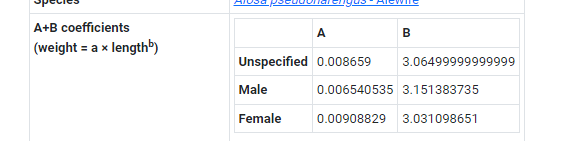

In [19]:
confirm_lw_ratio = False

def lw_prediction_delta(sex, length_mm, weight_g):
    if sex.lower()[0] == 'm':
        A, B = 0.00654, 3.15
    elif sex.lower()[0] == 'f':
        A, B = 0.00909, 3.03
    else:
        A, B = 0.00866, 3.06
        
    # in grams, length converted mm to cm
    predicted_weight_g = A * ((length_mm / 10) ** B)
    
    return predicted_weight_g / weight_g


if confirm_lw_ratio:
    pass

lw_prediction_delta('Male', 213, 138.600)

0.7214566965469218

In [20]:
df.sample()

,YEAR,MM,DD,WEEK,SITE,PERIOD,CONDITION,FISH_NO,FL_WET,FL_FROZEN,FL_STD,WEIGHT,SPECIES,SEX,MATURITY,GONAD_WEIGHT,1st Person Aging,AGE,FSP,Comments,2nd Person Aging,AGE.1,FSP.1,Comments.1,Envelop Comments,AGE_notes,FSP_notes,DATETIME
24743,2010,5,14,3,26,AM,Fresh,16,271,<NA>,271.000,270.900,A,F,4,40.700,NaN,5,3,NaN,NaN,<NA>,<NA>,NaN,NaN,5,3,2010-05-14


##### NOTE: fractional lengths seems to be correct for all data

In [28]:
dfTEMP = df[~(df.FL_FROZEN.isnull() | df.FL_STD.isnull())].copy().reset_index(drop=True)
dfTEMP['RATIO'] = dfTEMP.FL_FROZEN / dfTEMP.FL_STD
dfTEMP['RATIO'].describe()

count   25326.000
mean        0.968
std         0.002
min         0.949
25%         0.967
50%         0.969
75%         0.970
max         0.974
Name: RATIO, dtype: float64

In [40]:
dfTEMP2 = df[~(df.FL_WET.isnull() | df.FL_STD.isnull())].copy().reset_index(drop=True)
dfTEMP2['SHOULDBEONE'] = dfTEMP2.FL_WET / dfTEMP2.FL_STD
dfTEMP2['SHOULDBEONE'].describe()

count   9655.000
mean       1.000
std        0.000
min        1.000
25%        1.000
50%        1.000
75%        1.000
max        1.000
Name: SHOULDBEONE, dtype: float64

# Save the Final Dataset

In [25]:
if False:  # change this to save
    df.to_pickle('cleaned_dataset.pickle')